## Name : Ishika Gupta

# DATA SCIENCE AND BUSINESS ANALYTICS

## Task 1 : Prediction using Supervised Machine learning
### Predict the percentage of an student based on the no. of study hours.
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [2]:
#Reading the Data from Dataset
student=pd.read_csv("dataset.csv")

In [3]:
#Having a glance at some of the records
student.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Looking at the shape
student.shape

(25, 2)

In [7]:
#Checking if columns have null values
student.isna().any()

Hours     False
Scores    False
dtype: bool

#### Let's  plot  our  data  points  on  2-D  graph  to  eyeball  our  dataset  and  see  if  we  can  manually find  any  relationship   between  the  data.  We  can  create  the  plot  with  the  following  script:

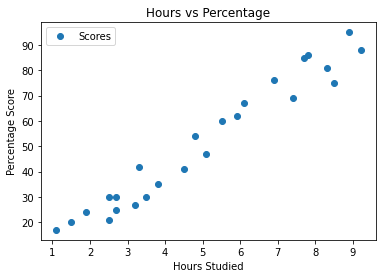

In [8]:
# Plotting the distribution of scores
student.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, one thing we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. Hence, it is a Linear Regression.

## PREPARING THE DATA

Now our next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
x = student.iloc[:, :-1].values  
y = student.iloc[:, 1].values  

Now, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

## TRAINING THE ALGORITHM
The value taken from the training dataset are trained using linear regression model algorithm.

In [11]:
from sklearn.linear_model import LinearRegression  
lr= LinearRegression()  
lr.fit(x_train, y_train) 
print("Training Successful.")

Training Successful.


## PLOTTING THE REGRESSION LINE

In [12]:
#Plotting the coefficient value required to plot the regression line
lr.coef_

array([9.91065648])

In [13]:
#Plotting the intercept value required to plot the regression line
lr.intercept_

2.018160041434683

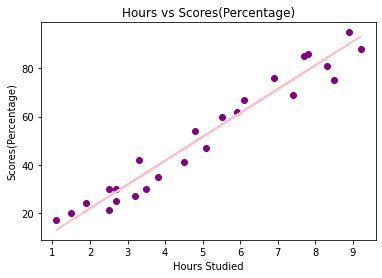

In [14]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y,color="purple")
plt.title("Hours vs Scores(Percentage)")
plt.xlabel("Hours Studied")
plt.ylabel("Scores(Percentage)")
plt.plot(x, line,color="pink");
plt.show()

## PREDICTING THE SCORES

In [15]:
# Testing data - In Hours
print(x_test)

# Predicting the scores
y_pred = lr.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### Comparing Actual data and Predicted data

In [16]:
details = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
details

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
# Testing with our own data
hours = [9.25]
pred = lr.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538


## EVALUATING THE MODEL
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


#### Checking the accuracy of our model

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356